# Polynomial Function Approximation via Taylor Series

This notebook approximates a given mathematical function using a **Taylor Series**.

The program will:
1. Accept a standard Python function (e.g., `sin(x)`).
2. Calculate the Taylor Polynomials step-by-step (Degree 0, 1, 2, ...).
3. Stop automatically if the function is fully described (for polynomials).
4. **Graph everything** on a single plot to visualize convergence.

**Usage:** Change the settings in the "User Configuration" cell below.

### Libraries Import

In [143]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

### User Configuration

In [144]:
# Variable symbol
x = sp.Symbol("x")
# Target function
target_function = sp.sin(x)
# Point of expansion
x0 = 1.0
# Maximum degree
max_degree = 12
# Range
x_limit = [-6,6]

print(f"Approximating function: {target_function}")
print(f"Centered at: {x0}")

Approximating function: sin(x)
Centered at: 1.0


### Calculating Function Approximation

In [145]:
# Initializing variables
taylor_polynomial = 0
approximation_steps = []
stopped_early = False

for n in range(max_degree + 1):
    # Calculating the derivatives
    derivative = sp.diff(target_function, x, n)

    # Evaluating the derivative at x0
    derivative_at_x0 = derivative.subs(x, x0)

    # Logic for stopping early
    if derivative == 0:
        stopped_early = True
        break

    # Building the term
    term = (derivative_at_x0 / sp.factorial(n)) * (x - x0)**n

    # Updating the cumulative sum
    taylor_polynomial += term

    # Storing approximation steps
    if derivative_at_x0 != 0:
        approximation_steps.append((n, taylor_polynomial))

### Plotting Function Approximation

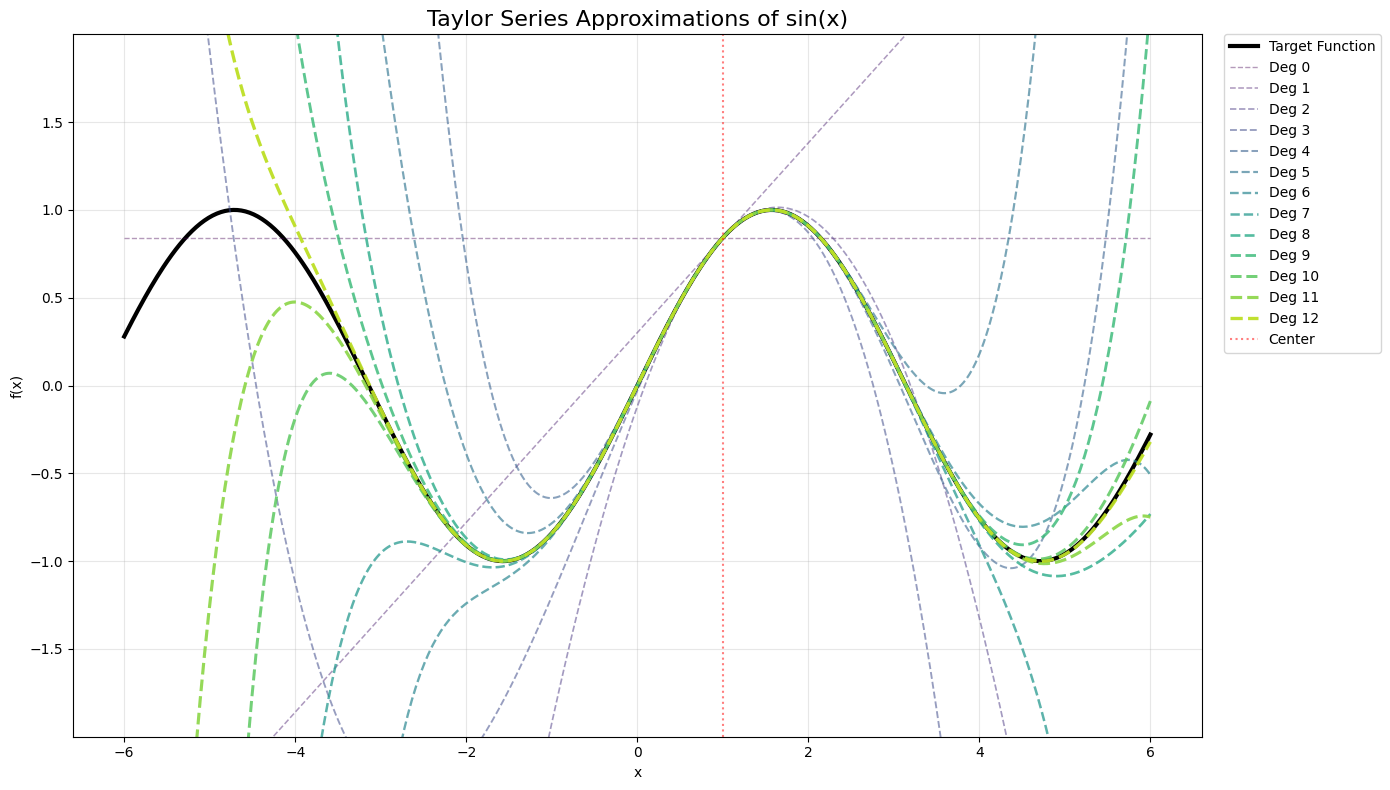

In [146]:
# Data Setup
x_vals = np.linspace(x_limit[0], x_limit[1], 500)
f_exact_numeric = sp.lambdify(x, target_function, modules=["numpy"])
y_exact = f_exact_numeric(x_vals)

# Fix for array issue
if np.ndim(y_exact) == 0:
    y_exact = np.full_like(x_vals, y_exact)

# Plot Setup
plt.figure(figsize=(14, 8))
plt.plot(x_vals, y_exact, color="black", linewidth=3, label="Target Function")
colors = plt.cm.viridis(np.linspace(0, 0.9, len(approximation_steps)))

for i, (degree, poly_expr) in enumerate(approximation_steps):
    # Creating runnable functions
    f_poly_numeric = sp.lambdify(x, poly_expr, modules=["numpy"])
    y_poly = f_poly_numeric(x_vals)
    if np.ndim(y_poly) == 0:
        y_poly = np.full_like(x_vals, y_poly)

    alpha_val = 0.4 + (0.6 * (i / len(approximation_steps)))
    width_val = 1.0 + (1.5 * (i / len(approximation_steps)))

    plt.plot(x_vals, y_poly, color=colors[i], linestyle="--",
             alpha=alpha_val, linewidth=width_val, label=f"Deg {degree}")

# Formatting
y_range = np.max(y_exact) - np.min(y_exact)
if y_range == 0: y_range = 1
plt.ylim(np.min(y_exact) - y_range*0.5, np.max(y_exact) + y_range*0.5)

plt.axvline(x0, color="red", linestyle=":", alpha=0.5, label="Center")
plt.title(f"Taylor Series Approximations of {target_function}", fontsize=16)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.)

plt.tight_layout()
plt.show()